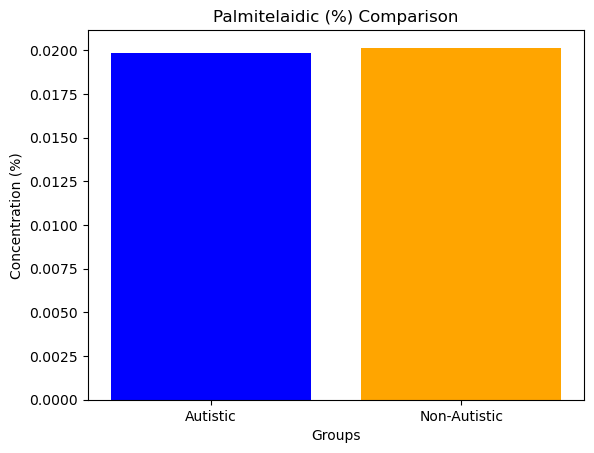

More information: ['Food sources: Fried foods, popcorn. It is an isomer, or equivalent molecular formula, of palmitic acid.']


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
from IPython.display import display, clear_output

# Load the CSV files
autistic_data = pd.read_csv('fatty_acid_autistic.csv')
non_autistic_data = pd.read_csv('fatty_acid_non_autistic.csv')
fatty_acids = autistic_data.columns.tolist()
fatty_acid_sources = pd.read_csv('fatty_acid_sources.csv')

def show_chart():
    selected_fa = selected_fatty_acid.get()

    # Bar chart
    categories = ['Autistic', 'Non-Autistic']
    values = [autistic_data[selected_fa].mean(), non_autistic_data[selected_fa].mean()]

    plt.bar(categories, values, color=['blue', 'orange'])

    plt.xlabel('Groups')

    # Update y-axis label based on the selected fatty acid
    if selected_fa.lower() == 'seafood meals per month':
        plt.ylabel('Number of Meals')
    elif selected_fa.lower() in ['dha/aa', 'epa/aa', 'n-3/n-6', 'pufa']:
        plt.ylabel('')
    else:
        plt.ylabel('Concentration (%)')

    plt.title(f'{selected_fa} Comparison')

    # Print common food sources
    common_sources = fatty_acid_sources[fatty_acid_sources['Fatty Acid'].str.lower() == selected_fa.lower()]['Common Sources'].values
    print(f"Common Food Sources: {common_sources}")

    # Show the chart
    clear_output(wait=True)
    plt.show()

def show_sources():
    selected_fa = selected_fatty_acid.get()
    common_sources = fatty_acid_sources[fatty_acid_sources['Fatty Acid'] == selected_fa]['Common Sources'].values
    print(f"More information: {common_sources}")

root = Tk()
root.title("Fatty Acid Concentration Analysis")

# Dropdown menu for fatty acids
selected_fatty_acid = StringVar(root)
selected_fatty_acid.set(fatty_acids[0])  # Default selection

fa_label = Label(root, text="I want to compare:")
fa_label.pack()

fa_dropdown = OptionMenu(root, selected_fatty_acid, *fatty_acids)
fa_dropdown.pack()

# Button to show the chart
show_button = Button(root, text="Visualize", command=show_chart)
show_button.pack()

# Button to show common food sources
sources_button = Button(root, text="Tell me more", command=show_sources)
sources_button.pack()

root.mainloop()
